##Getting the data


In [1]:
import pandas as pd
data = pd.read_csv('winequality-red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
#checking if null values are present
data.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


##Data analysis


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='quality', ylabel='chlorides'>

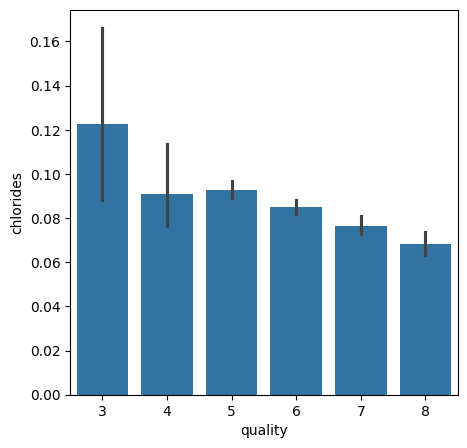

In [5]:
#chlorides vs quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='chlorides', data=data)

<Axes: xlabel='quality', ylabel='citric acid'>

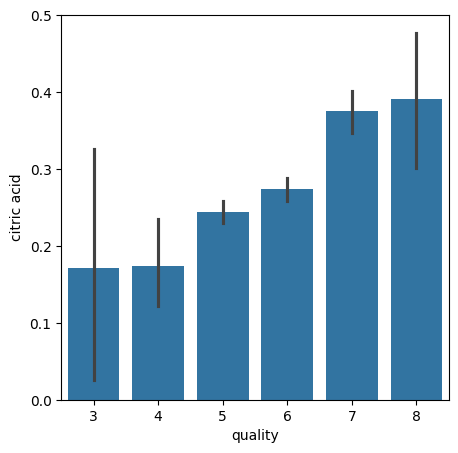

In [7]:
#citric acid vs quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='citric acid', data=data)

<Axes: xlabel='quality', ylabel='density'>

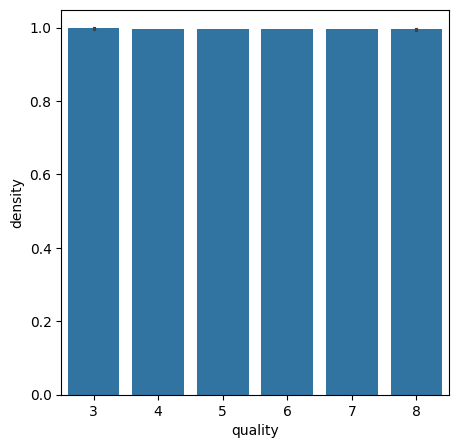

In [8]:
#density vs quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='density', data=data)

<Axes: xlabel='quality', ylabel='alcohol'>

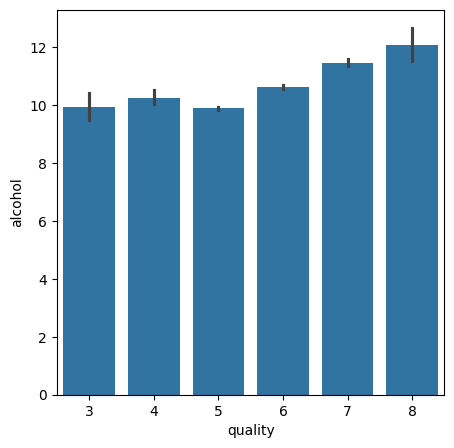

In [9]:
#alcohol vs quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='alcohol', data=data)

<Figure size 500x500 with 0 Axes>

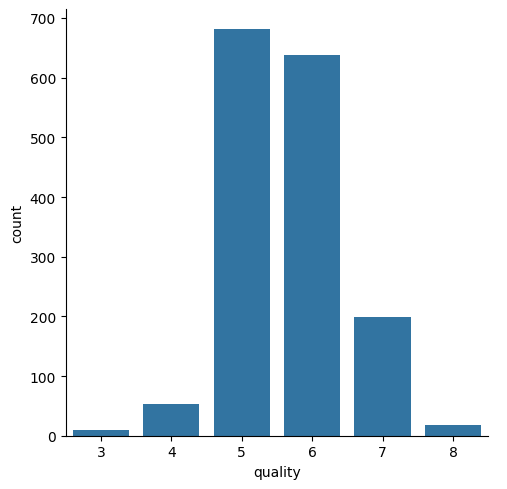

In [10]:
#plotting catplot for checking different values of the output
plot = plt.figure(figsize=(5,5))
sns.catplot(x='quality', kind='count', data=data)

In [11]:
correlation = data.corr()

<Axes: >

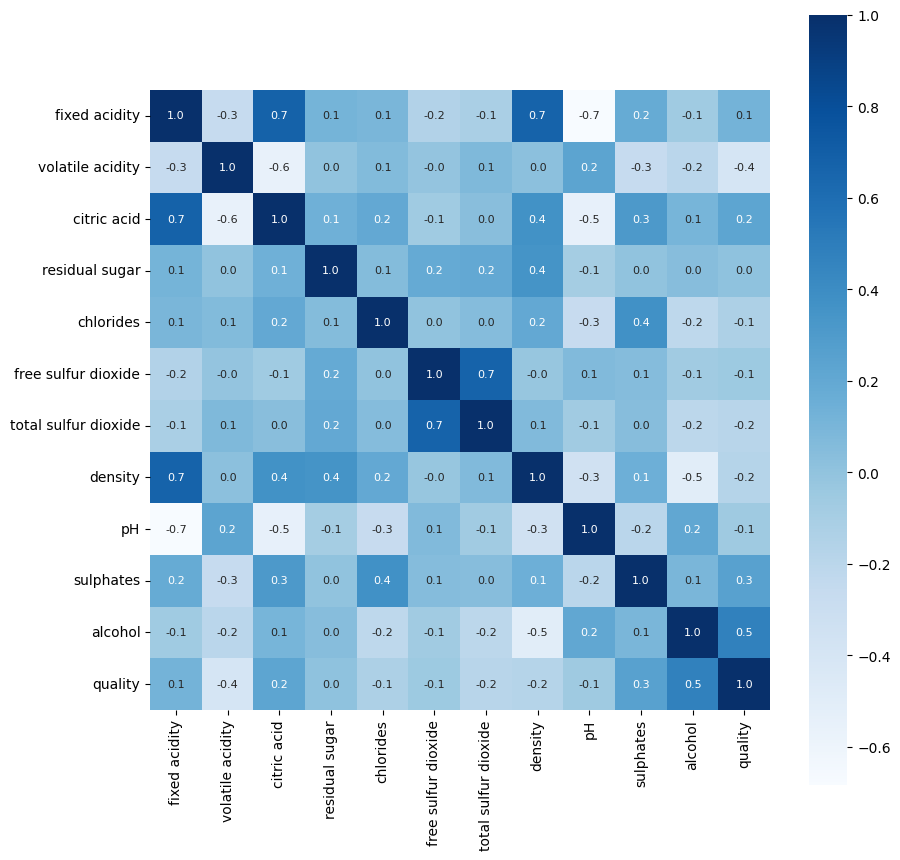

In [13]:
#plotting heatmap for better visualization
plot = plt.figure(figsize=(10,10))
sns.heatmap(correlation, annot=True, cmap='Blues', annot_kws={'size':8}, cbar=True, square=True, fmt='.1f')

## Output Label Binarization

In [25]:
x = data.drop('quality', axis=1)
y = data['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)

##Splitting data into Train and Test

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(x.shape, x_train.shape, x_test.shape)

(1599, 11) (1279, 11) (320, 11)


##Model: Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [28]:
predict_y = model.predict(x_test)

## Checking Accuracy

In [29]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, predict_y)
print(f"The accuracy score is {acc :.2f}")

The accuracy score is 0.91


##Making Predictions

In [33]:
import numpy as np

In [34]:
input = (11.2,	0.28,	0.56,	1.9,	0.075,	17.0,	60.0,	0.998,	3.16,	0.58,	9.8)
input_as_numpy_array = np.asarray(input)
input_reshaped = input_as_numpy_array.reshape(1,-1)
prediction = model.predict(input_reshaped)
print(prediction)
if prediction[0]==1:
  print('Good Quality Wine')
else:
  print('Bad Quality Wine')

[0]
Bad Quality Wine


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
